# Python Clase 7

## Symbolic Computation

Symbolic computation deals with the computation of mathematical objects symbolically. 

This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

In [1]:
import math

In [2]:
# is a perfect square
math.sqrt(9)

3.0

In [3]:
# but how about this
math.sqrt(8)

2.8284271247461903

we'd like to get something like this $8=2\sqrt{2}$

In [4]:
import sympy

In [6]:
sympy.sqrt(8)

2*sqrt(2)

## Variables are defined using symbols

In [2]:
from sympy import symbols

In [9]:
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [10]:
# The expression now can be manipulated
expr + 1

x + 2*y + 1

In [11]:
expr - x

2*y

we might prefer the factored form 

In [12]:
x*expr

x*(x + 2*y)

In [21]:
from sympy import expand, factor, simplify

In [15]:
expanded = expand(x*expr)
expanded

x**2 + 2*x*y

In [16]:
factor(expanded)

x*(x + 2*y)

### Symbols and python variables
subsituing values

In [3]:
x = symbols('x')
expr = x + 1
x = 2
print(expr)

x + 1


In [4]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2)

3

In [5]:
x, y, z = symbols('x  y z')
(x**2 + x**4).xreplace({x**2: y, x**4: z})

y + z

### Thus, the best way to check if a=b is to take a−b and simplify it

    $(x + 1)^2 == x**2 + 2*x + 1$

In [22]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

0

## Basic operations

In [23]:
from sympy import *

In [24]:
x, y, z = symbols("x y z")

In [26]:
expr = cos(x) + 1
expr.subs(x, y)

cos(y) + 1

In [27]:
expr.subs(x, 0)

2

In [28]:
expr = x**y
expr = expr.subs(y, x**x)

In [29]:
expr

x**(x**x)

###  SymPy objects are immutable. That means that subs does not modify it in-place.

In [30]:
expr = cos(x)
expr.subs(x, 0)

1

In [31]:
expr

cos(x)

In [32]:
# Ejercicio -- para las potencias pares sustituir x por y
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3

In [33]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

-4*x**3 - 2*x + y**4 + 4*y**2 + 3

## SymPy Expressions

In [34]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

x**2 + 3*x - 1/2

In [38]:
expr.subs(x, 2)

19/2

### evalf

In [39]:
pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [41]:
one = cos(1)**2 + sin(1)**2
one

cos(1)**2 + sin(1)**2

In [42]:
(one - 1).evalf()

-0.e-124

In [43]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

## lambdify

take the function from different libraries and evaluate them

In [44]:
import numpy 

a = numpy.arange(10) 
expr = sin(x)
f = lambdify(x, expr, "numpy") 
f(a) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [46]:
f = lambdify(x, expr, "math")
f(0.1)

0.09983341664682815

## Pretty Printing

In [47]:
from sympy import init_printing
init_printing() 

In [49]:
str(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

In [48]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [53]:
#unicode
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


In [52]:
# Latex
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


$\int \sqrt{\frac{1}{x}}\, dx$

## Simplification

In [55]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [56]:
expand((x + 1)**2)

In [57]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [58]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [60]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [62]:
collected_expr = collect(expr, x)
collected_expr

In [63]:
collected_expr.coeff(x, 2)

In [64]:
#canonical form

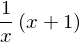

In [65]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

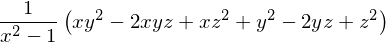

In [66]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

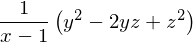

In [67]:
cancel(expr)

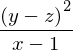

In [68]:
factor(expr)

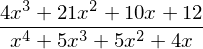

In [69]:
#apart() performs a partial fraction decomposition on a rational function
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

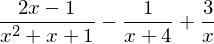

In [70]:
apart(expr)

## Trigonometric Simplification

In [71]:
cos(acos(x))

In [72]:
asin(1)

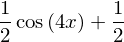

In [73]:
#trigsimp
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [74]:
#expand_trig
expand_trig(sin(x + y))

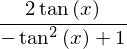

In [75]:
expand_trig(tan(2*x))

## Powers

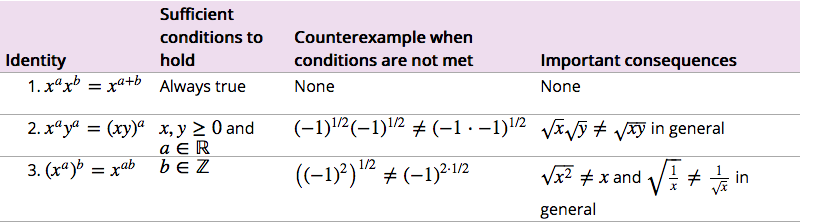

In [76]:
from IPython.display import Image
Image("data/power_simpy.png")

In [78]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [79]:
powsimp(x**a*x**b)

In [80]:
powsimp(x**a*y**a)

In [81]:
powsimp(t**c*z**c)

In [82]:
#If you know that you want to apply this simplification, but you don’t want to mess with assumptions
powsimp(t**c*z**c, force=True)

In [83]:
#Note that in some instances, identity 2 holds, it will be applied automatically.
sqrt(x*y)

## Exponentials and logarithms

Neither identity is true for arbitrary complex x and y, due to the branch cut in the complex plane for the complex logarithm. 

However, sufficient conditions for the identities to hold are if x and y are positive and n is real.

log(xy)=log(x)+log(y)

log(xn)=nlog(x)

In [86]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

In [84]:
expand_log(log(x*y))

In [87]:
expand_log(log(x**n))

In [88]:
expand_log(log(z*t))

In [89]:
expand_log(log(z**2))

In [90]:
expand_log(log(z**2), force=True)

In [91]:
logcombine(log(x) + log(y))

In [92]:
logcombine(n*log(x))

# Special Functions

In [93]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')


In [101]:
reduce(lambda x, y: x*y, [i+1 for i in range(4)])

In [97]:
# Ejercicio
factorial(n)

In [96]:
factorial(4).evalf()

In [103]:
gamma(z)

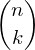

In [102]:
binomial(n, k)

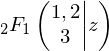

In [104]:
hyper([1, 2], [3], z)

### rewrite

In [105]:
factorial(x).rewrite(gamma)

In [106]:
expand_func(gamma(x + 3))

### combsimp

In [107]:
n, k = symbols('n k', integer = True)
combsimp(factorial(n)/factorial(n - 3))

In [109]:
gammasimp(gamma(x)*gamma(1 - x))

NameError: name 'gammasimp' is not defined

## Continue fractions

In [111]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr

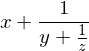

In [116]:
list_to_frac([x, y, z])

In [117]:
syms = symbols('a0:5')
syms

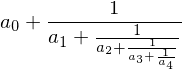

In [118]:
frac = list_to_frac(syms)
frac

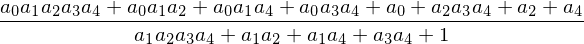

In [119]:
frac = cancel(frac)
frac

## Calculus

In [1]:
from sympy import *
init_printing(use_unicode=True)

x, y, z = symbols('x y z')

### Derivatives

In [2]:
diff(cos(x), x)

In [3]:
diff(exp(x**2), x)

In [4]:
diff(x**4, x, x, x)

In [5]:
diff(x**4, x, 3)

In [7]:
expr = exp(x*y*z)
expr 

In [8]:
diff(expr, x, y, y, z, z, z, z)

In [9]:
diff(expr, x, y, 2, z, 4)

### unevaluated derivative

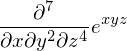

In [11]:
deriv= Derivative(expr, x, y, y, z, 4)
deriv

In [12]:
deriv.doit()

In [13]:
latex(deriv.doit())

'x^{3} y^{2} \\left(x^{3} y^{3} z^{3} + 14 x^{2} y^{2} z^{2} + 52 x y z + 48\\right) e^{x y z}'

## Integrals

In [14]:
integrate(cos(x), x)

In [15]:
integrate(exp(-x), (x, 0, oo))

In [16]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

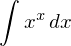

In [18]:
#unable to compute an integral
expr = integrate(x**x, x)
expr

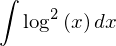

In [23]:
#unevaluated integral using 
expr = Integral(log(x)**2, x)
expr

In [21]:
expr.doit()

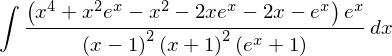

In [25]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x -
     exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

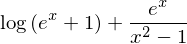

In [26]:
integ.doit()

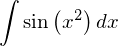

In [27]:
integ = Integral(sin(x**2), x)
integ

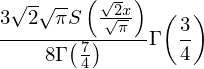

In [28]:
integ.doit()

## Limits

In [29]:
limit(sin(x)/x, x, 0)

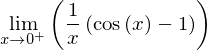

In [30]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [31]:
expr.doit()

### Do it

In [32]:
limit(1/x, x, 0, '+')

In [33]:
limit(1/x, x, 0, '-')

## Series Expansion

In [36]:
expr = exp(sin(x))
expr

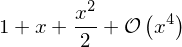

In [37]:
expr.series(x, 0, 4)

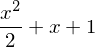

In [38]:
expr.series(x, 0, 4).removeO()

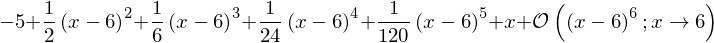

In [39]:
exp(x - 6).series(x, x0=6)

### Solvers

In [40]:
Eq(x, y)

In [41]:
solveset(Eq(x**2, 1), x)

In [42]:
solveset(Eq(x**2 - 1, 0), x)

In [43]:
solveset(x**2 - 1, x)

## Solving Equations Algebraically

In [49]:
 solveset(x**2 - x, x)

In [45]:
solveset(x - x, x)

In [46]:
solveset(x - x, x, domain=S.Reals)

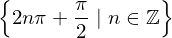

In [50]:
solveset(sin(x) - 1, x, domain=S.Reals)

In [51]:
# No tiene solucion
solveset(exp(x), x) 

In [52]:
# No encuentra solucion
solveset(cos(x) - x, x)

# linear equations 

In [53]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [54]:
# MAtrix form
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

In [55]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a, a - b], [a, b])

In [57]:
# 0 multipl 1 and 3 multi 2
roots(x**3 - 6*x**2 + 9*x, x)

## Solving Differential Equations

In [6]:
f, g = symbols('f g', cls=Function)
#f = Function('f')
#f = lambdify([x, y], x + y)

NameError: name 'Function' is not defined

In [59]:
f(x)

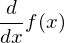

In [60]:
f(x).diff(x)

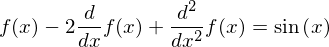

In [61]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

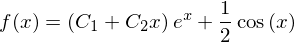

In [62]:
dsolve(diffeq, f(x))

In [63]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))

### Matrices

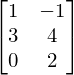

In [64]:
Matrix([[1, -1], [3, 4], [0, 2]])

In [65]:
Matrix([1, 2, 3])

In [66]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

## Basic Operations

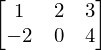

In [76]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

In [69]:
M.shape

In [70]:
M.row(0)

In [71]:
M.col(-1)

In [77]:
M.col_del(0)

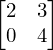

In [78]:
M

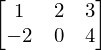

In [79]:
M = M.col_insert(0, Matrix([1, -2]))
M

In [80]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])

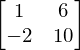

In [81]:
M+N

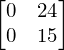

In [82]:
M*N

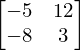

In [83]:
M**2

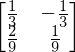

In [84]:
#Que obtengo?
M**-1

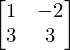

In [85]:
M.T

### Matrix Constructors

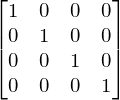

In [86]:
eye(4)

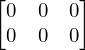

In [87]:
zeros(2, 3)

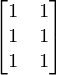

In [88]:
ones(3, 2)

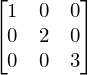

In [89]:
diag(1, 2, 3)

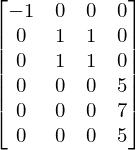

In [90]:
diag(-1, ones(2, 2), Matrix([5, 7, 5]))

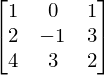

In [91]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

In [92]:
M.det()

In [93]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])

In [94]:
M.eigenvals()

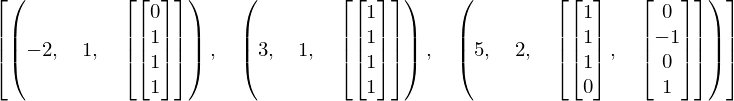

In [95]:
M.eigenvects()